# 机器学习算法一览，应用建议与解决思路 

作者：寒小阳
时间：2016年1月。
出处：http://blog.csdn.net/han_xiaoyang/article/details/50469334
声明：版权所有，转载请联系作者并注明出处

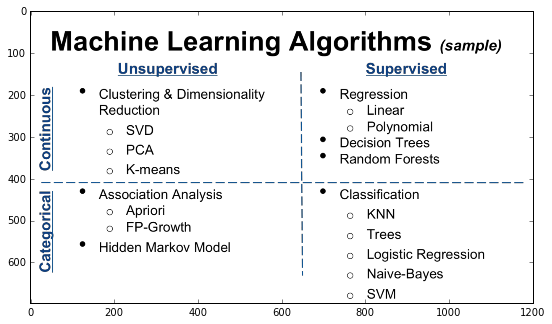

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt  
plt.figure(figsize=[9.0, 8.5])
plt.imshow(plt.imread('pic/ml_conceptml_algorithms.png') )  

## 1.1从机器学习问题角度分类

我们先从机器学习问题本身分类的角度来看，我们可以分成下列类型的算法：
***
* 监督学习算法

>机器学习中有一大部分的问题属于『监督学习』的范畴，简单口语化地说明，这类问题中，给定的训练样本中，每个样本的输入x都对应一个确定的结果y，我们需要训练出一个模型(数学上看是一个x→y的映射关系f)，在未知的样本x′给定后，我们能对结果y′做出预测。

>这里的预测结果如果是**离散值**(很多时候是类别类型，比如邮件分类问题中的垃圾邮件/普通邮件，比如用户会/不会购买某商品)，那么我们把它叫做分类问题(classification problem)；如果预测结果是**连续值**(比如房价，股票价格等等)，那么我们把它叫做回归问题(regression problem)。

>有一系列的机器学习算法是用以解决监督学习问题的，比如最经典的用于分类问题的朴素贝叶斯、逻辑回归、支持向量机等等；比如说用于回归问题的线性回归等等。
***

* 无监督学习

>有另外一类问题，给我们的样本并没有给出『标签/标准答案』，就是一系列的样本。而我们需要做的事情是，在一些样本中抽取出通用的规则。这叫做『无监督学习』。包括关联规则和聚类算法在内的一系列机器学习算法都属于这个范畴。
***

* 半监督学习

>这类问题给出的训练数据，有一部分有标签，有一部分没有标签。我们想学习出数据组织结构的同时，也能做相应的预测。此类问题相对应的机器学习算法有自训练(Self-Training)、直推学习(Transductive Learning)、生成式模型(Generative Model)等。


## 1.2从算法的功能角度分类
我们也可以从算法的共性(比如功能，运作方式)角度对机器学习算法分类。下面我们根据算法的共性去对它们归个类。不过需要注意的是，我们下面的归类方法可能对分类和回归有比较强的倾向性，而这两类问题也是最常遇到的。
* 回归算法(Regression Algorithms)
>回归算法是一种通过最小化预测值与实际结果值之间的差距，而得到输入特征之间的最佳组合方式的一类算法。对于连续值预测有线性回归等，而对于离散值/类别预测，我们也可以把逻辑回归等也视作回归算法的一种，常见的回归算法如下：


>   * Ordinary Least Squares Regression (OLSR)
>   * Linear Regression
>   * Logistic Regression
>   * Stepwise Regression
>   * Locally Estimated Scatterplot Smoothing (LOESS)
>   * Multivariate Adaptive Regression Splines (MARS)


## 2.机器学习算法使用图谱

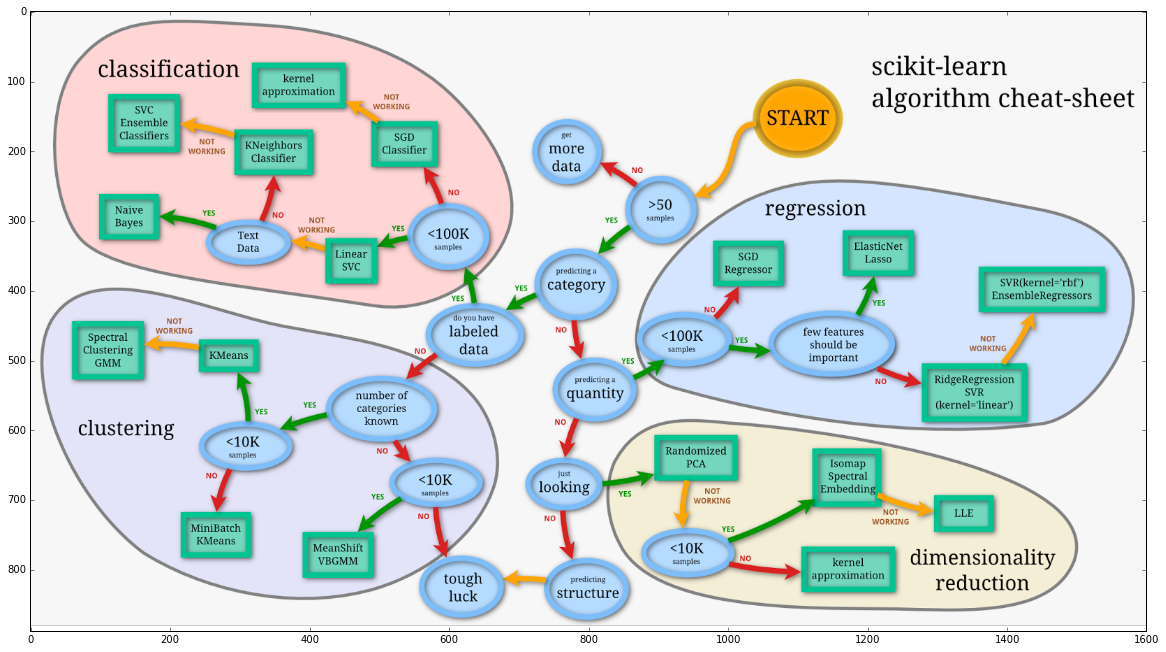

In [12]:
plt.figure(figsize=[20.0, 16.5])
plt.imshow(plt.imread('pic/ml_conceptsklearn_ml_cheat_sheet.png') )  

首先样本量如果非常少的话，其实所有的机器学习算法都没有办法从里面『学到』通用的规则和模式，so多弄点数据是王道。然后根据问题是有/无监督学习和连续值/离散值预测，分成了分类、聚类、回归和维度约减四个方法类，每个类里根据具体情况的不同，又有不同的处理方法。

# 3.机器学习问题解决思路
上面带着代价走马观花过了一遍机器学习的若干算法，下面我们试着总结总结在拿到一个实际问题的时候，如果着手使用机器学习算法去解决问题，其中的一些注意点以及核心思路。主要包括以下内容：

> 
   * 拿到数据后怎么了解数据(可视化)
   * 选择最贴切的机器学习算法
   * 定位模型状态(过/欠拟合)以及解决方法
   * 大量极的数据的特征分析与可视化
   * 各种损失函数(loss function)的优缺点及如何选择

多说一句，这里写的这个小教程，主要是作为一个通用的建议和指导方案，你不一定要严格按照这个流程解决机器学习问题。

3.1 数据与可视化

我们先使用scikit-learn的make_classification函数来生产一份分类数据，然后模拟一下拿到实际数据后我们需要做的事情。

In [13]:
#numpy科学计算工具箱
import numpy as np
#使用make_classification构造1000个样本，每个样本有20个feature
from sklearn.datasets import make_classification
X, y = make_classification(1000, n_features=20, n_informative=2, 
                           n_redundant=2, n_classes=2, random_state=0)
#存为dataframe格式
from pandas import DataFrame
df = DataFrame(np.hstack((X, y[:, None])),columns = range(20) + ["class"])

我们生成了一份包含1000个分类数据样本的数据集，每个样本有20个数值特征。同时我们把数据存储至pandas中的DataFrame数据结构中。我们取前几行的数据看一眼：

In [14]:
df[:6]

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,class
0,-1.063780,0.676409,1.069356,-0.217580,0.460215,-0.399167,-0.079188,1.209385,-0.785315,-0.172186,...,-0.993119,0.306935,0.064058,-1.054233,-0.527496,-0.074183,-0.355628,1.057214,-0.902592,0
1,0.070848,-1.695281,2.449449,-0.530494,-0.932962,2.865204,2.435729,-1.618500,1.300717,0.348402,...,0.225324,0.605563,-0.192101,-0.068027,0.971681,-1.792048,0.017083,-0.375669,-0.623236,1
2,0.940284,-0.492146,0.677956,-0.227754,1.401753,1.231653,-0.777464,0.015616,1.331713,1.084773,...,-0.050120,0.948386,-0.173428,-0.477672,0.760896,1.001158,-0.069464,1.359046,-1.189590,1
3,-0.299517,0.759890,0.182803,-1.550233,0.338218,0.363241,-2.100525,-0.438068,-0.166393,-0.340835,...,1.178724,2.831480,0.142414,-0.202819,2.405715,0.313305,0.404356,-0.287546,-2.847803,1
4,-2.630627,0.231034,0.042463,0.478851,1.546742,1.637956,-1.532072,-0.734445,0.465855,0.473836,...,-1.061194,-0.888880,1.238409,-0.572829,-1.275339,1.003007,-0.477128,0.098536,0.527804,0
5,-0.262645,0.327590,0.997845,-1.577903,-0.828981,-0.202735,0.825932,-0.489252,0.849912,-0.035563,...,0.935624,1.741002,1.930498,0.069474,-0.643267,-0.257866,0.260081,-0.001670,-1.639319,1


不幸的是，肉眼看数据，尤其是维度稍微高点的时候，很有可能看花了也看不出看不出任何线索。幸运的是，我们对于图像的理解力，比数字好太多，而又有相当多的工具可以帮助我们『可视化』数据分布。

>我们在处理任何数据相关的问题时，了解数据都是很有必要的，而可视化可以帮助我们更好地直观理解数据的分布和特性

数据的可视化有很多工具包可以用，比如下面我们用来做数据可视化的工具包Seaborn。最简单的可视化就是数据散列分布图和柱状图，这个可以用Seanborn的pairplot来完成。以下图中2种颜色表示2种不同的类，因为20维的可视化没有办法在平面表示，我们取出了一部分维度，两两组成pair看数据在这2个维度平面上的分布状况，代码和结果如下：

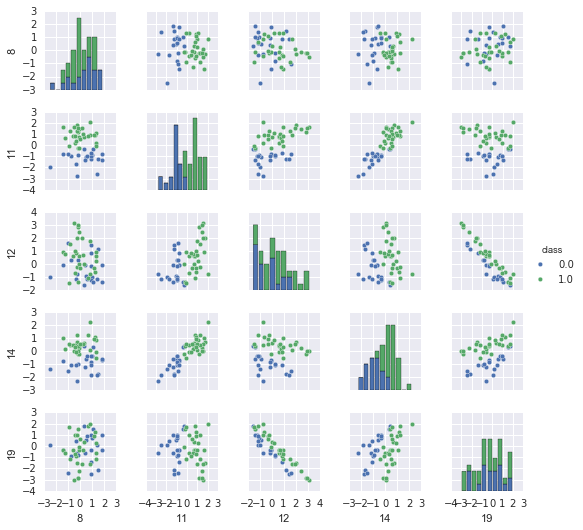

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
#使用pairplot去看不同特征维度pair下数据的空间分布状况
_ = sns.pairplot(df[:50], vars=[8, 11, 12, 14, 19], hue="class", size=1.5)
plt.show()

我们从散列图和柱状图上可以看出，确实有些维度的特征相对其他维度，有更好的区分度，比如第11维和14维看起来很有区分度。这两个维度上看，数据点是近似线性可分的。而12维和19维似乎呈现出了很高的负相关性。接下来我们用Seanborn中的corrplot来计算计算各维度特征之间(以及最后的类别)的相关性。代码和结果图如下：

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
_ =sns.corrplot(df, annot=False)
plt.show()

AttributeError: 'module' object has no attribute 'corrplot'